In [1]:
import os
import sys
import glob
import numpy as np
import math
import pandas
import subprocess
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import rc
from astropy.time import Time
import sncosmo

from scipy import stats as stats
from scipy.optimize import curve_fit
from statistics import mean
from statistics import median
import scipy
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import csv
import glob
from matplotlib import rc
from symfit import parameters, variables, sin, cos, Fit


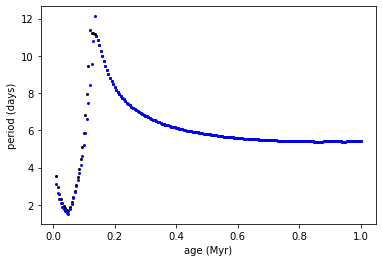

In [3]:
data = pandas.read_csv('Star: Mass_2.00 Age_ 1.00TF_0/Period', skiprows=0, delimiter='\s+')
periods = []
ages = []
for index, row in data.iterrows():
    ages.append(float(row[0]))
    periods.append(float(row[1]))
   
plt.scatter(ages, periods, s=4,color='black')

data = pandas.read_csv('Star: Mass_2.00 Age_ 1.00TF_1/Period', skiprows=0, delimiter='\s+')
periods = []
ages = []
for index, row in data.iterrows():
    ages.append(float(row[0]))
    periods.append(float(row[1]))
   
plt.scatter(ages, periods, s=4,color='blue')

plt.xlabel('age (Myr)')
plt.ylabel('period (days)')
plt.show()


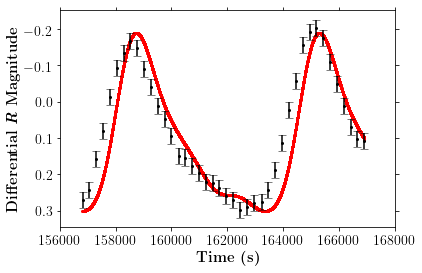

In [175]:
########################
### Day2 Data
########################
data = pandas.read_csv('Day2_R_lightcurve.txt', skiprows=1, delimiter='\s+')
Day2VartimeR = []
Day2DiffMagnitudeR = []
for index, row in data.iterrows():
    if row[0] != '#':
        timestamp = float(row[1])*3600
        magnitude = float(row[2])
        Day2VartimeR.append(timestamp)
        Day2DiffMagnitudeR.append(magnitude)

Day2DiffMagnitudeR = np.array(Day2DiffMagnitudeR)
Day2VartimeR = np.array(Day2VartimeR)

data = pandas.read_csv('Day2_V_lightcurve.txt', skiprows=1, delimiter='\s+')
Day2VartimeV = []
Day2DiffMagnitudeV = []
for index, row in data.iterrows():
    if row[0] != '#':
        timestamp = float(row[1])*3600
        magnitude = float(row[2])
        Day2VartimeV.append(timestamp)
        Day2DiffMagnitudeV.append(magnitude)

Day2DiffMagnitudeV = np.array(Day2DiffMagnitudeV)
Day2VartimeV = np.array(Day2VartimeV)


## RBAND
a0 = 0.3826
a1 = 0.06696
a2 = 0.08187
a3 = 0.023218 
a4 = -0.0067719 
a5 = -0.0028473 
b1 = -0.1954 
b2 = -0.0024281
b3 = 0.026963 
b4 = 0.0040846 
b5 = -0.000083139
t0 = -71867
w =(2*math.pi/6560)

timesR = range(int(min(Day2VartimeR)) + 86400,int(max(Day2VartimeR))+ 86400)

ProjectionRBand = fourier_series(timesR,a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,w,t0)
plt.scatter(timesR, ProjectionRBand-.26, s=4,color='red')
plt.scatter(Day2VartimeR+86400, Day2DiffMagnitudeR, s=4,color='black')
plt.errorbar(Day2VartimeR+86400, Day2DiffMagnitudeR, yerr=.022,ls='',capsize=4,capthick=.5, color='black')

plt.rc('text', usetex=True)
ax = plt.gca()
fig = plt.gcf()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='x', which='minor', labelsize=14)
plt.xlim(156000, 168000)
plt.rc('font', family='serif',size = 15)
plt.ylabel(r'\textbf{Differential \textit{R} Magnitude}')
plt.xlabel(r'\textbf{Time (s)}')
plt.gca().invert_yaxis()
plt.savefig("/Users/touatokuchi/Desktop/Day2R_LightCurve.pdf")
plt.show()



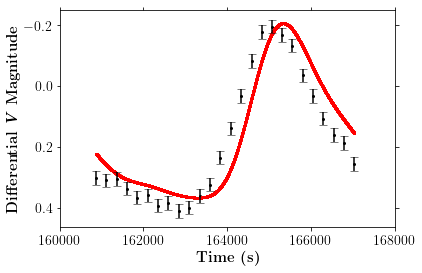

In [176]:


## VBAND
a0 = 0.042293
a1 = 0.0685
a2 = 0.094044
a3 = 0.025438 
a4 = -0.0057433 
a5 = -0.0011205 
b1 = -0.2417 
b2 = -0.0078239 
b3 = 0.024548
b4 = 0.0094819
b5 = 0.0014096
t0 = -71930
w =(2*math.pi/6560)
timesV = range(int(min(Day2VartimeV)) + 86400,int(max(Day2VartimeV))+ 86400)
ProjectionVBand = fourier_series(timesV,a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,w,t0)

plt.scatter(Day2VartimeV+86400, Day2DiffMagnitudeV, s=4,color='black')
plt.scatter(timesV, ProjectionVBand+.12, s=4,color='red')
plt.errorbar(Day2VartimeV+86400, Day2DiffMagnitudeV, yerr=.022,ls='',capsize=4,capthick=.5, color='black')


plt.rc('text', usetex=True)
ax = plt.gca()
fig = plt.gcf()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='x', which='minor', labelsize=14)
plt.xlim(160000, 168000)
plt.rc('font', family='serif',size = 15)
plt.ylabel(r'\textbf{Differential \textit{V} Magnitude}')
plt.xlabel(r'\textbf{Time (s)}')
plt.savefig("/Users/touatokuchi/Desktop/Day2V_LightCurve.pdf")
plt.gca().invert_yaxis()
plt.show()


In [47]:
def PlotDistribution(data):
        n, bins, patches = plt.hist(data, 60, density=1, facecolor='darkblue', alpha=0.75)
        (dataMu, dataSigma) = norm.fit(data)
        y = scipy.stats.norm.pdf( bins, dataMu, dataSigma)
        l = plt.plot(bins, y, 'r--', linewidth=2)
        
        plt.xlabel('Magnitude')
        plt.ylabel('Count')
        plt.title(r'$\mathrm{Reference\ Star\ Magnitudes:}\ \mu=%.3f,\ \sigma=%.3f$' %(dataMu, dataSigma))
        plt.grid(True)
        #plt.savefig(str(data[0]) + '.pdf')
        plt.show()

In [125]:
### Star #4 was measured to be ~13.81Mag. True magnitude is 12.97 V. ~0.83 Mag diff
### 289.009001, 30.257948
### 19h 16m 2.1s, 2h 1m 1.9s
data = pandas.read_csv('RBANDOUTPUT.LIST', skiprows=1, delimiter='\s+')
#data = pandas.read_csv('VBANDOUTPUT.LIST', skiprows=1, delimiter='\s+')

RStar_TAGS = [[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]]] #multidimensional array, first index corresponds to star
for index, row in data.iterrows():
    if row[0] != '#':
        TAG = int(row[0])-1
        day = '30'
        month = '09'
        hour = row[1][11:13] ## convert to UTC
        if int(hour) >=17:
            day = '02'
            month = '10'
            hour = '0' + str(int(hour)+7-24)
        minute = row[1][13:15]
        second = row[1][15:17]
        MJDTime = '2020-' + month + '-' + day + 'T' + str(hour) + ':' + str(row[1][13:15]) + ':' + str(row[1][15:17]) 
        t = Time(MJDTime, format='isot', scale='utc')
        magnitude = float(row[8])
        magErr = float(row[9])
        RStar_TAGS[TAG][0].append(float(second)+float(minute)*60+float(row[1][11:13])*3600)
        #RStar_TAGS[TAG][0].append(t.jd)
        #print(t.mjd)
        RStar_TAGS[TAG][1].append(magnitude)
        RStar_TAGS[TAG][2].append(magErr)


[0.028999999999999998, 0.026000000000000002, 0.027000000000000003, 0.027000000000000003, 0.027999999999999997, 0.027000000000000003, 0.027000000000000003, 0.028999999999999998, 0.027000000000000003, 0.027000000000000003, 0.026000000000000002, 0.026000000000000002, 0.025, 0.026000000000000002, 0.025, 0.027000000000000003, 0.027000000000000003, 0.026000000000000002, 0.026000000000000002, 0.026000000000000002, 0.027000000000000003, 0.027000000000000003, 0.027000000000000003, 0.025, 0.024, 0.026000000000000002, 0.026000000000000002, 0.027000000000000003, 0.025, 0.027000000000000003, 0.027000000000000003, 0.027000000000000003, 0.027000000000000003, 0.026000000000000002, 0.025, 0.027000000000000003, 0.026000000000000002, 0.025, 0.026000000000000002, 0.027000000000000003, 0.027000000000000003, 0.026000000000000002]


83
83
0.011433734939759035


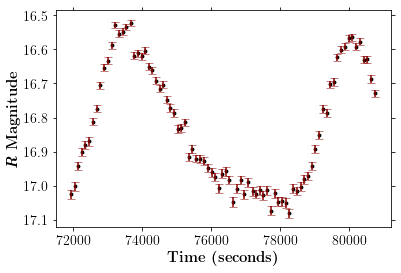

83
83
0.05003614457831325


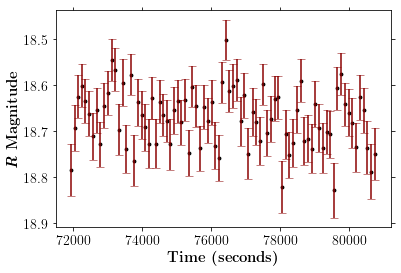

83
83
0.00897590361445783


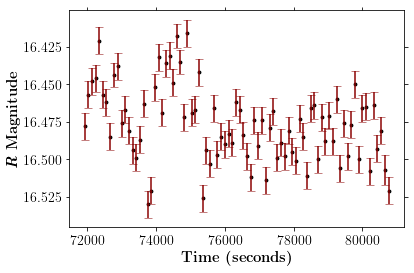

83
83
0.002


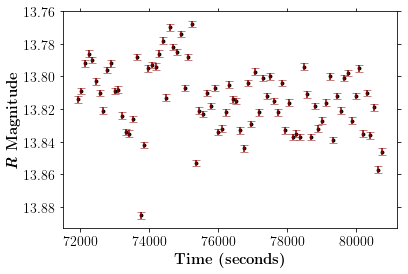

83
83
0.00791566265060241


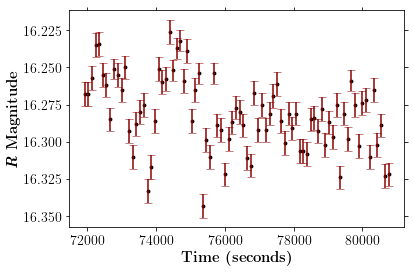

83
83
0.009927710843373494


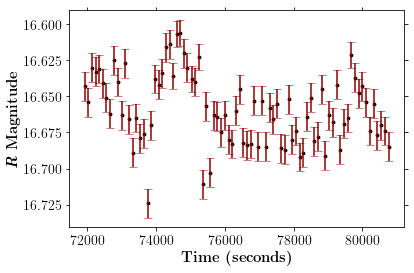

In [126]:
for i in range(6):
    times = np.array(RStar_TAGS[i][0][1:])
    magnitudes2 = np.array(RStar_TAGS[i][1][1:])
    magnitudeErrs = np.array(RStar_TAGS[i][2][1:])
    #if i != 1 and i != 0:
        #PlotDistribution(magnitudes2)
    print(len(times))
    print(len(magnitudes2))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size = 15)
    plt.ylabel(r'\textbf{\textit{R} Magnitude}')
    #plt.xlabel(r'\textbf{Julian Date}')
    plt.xlabel(r'\textbf{Time (seconds)}')
    plt.gca().invert_yaxis()
    ax = plt.gca()
    fig = plt.gcf()
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.scatter(times, magnitudes2, s=8, color='black')
    print(mean(magnitudeErrs))
    plt.errorbar(times, magnitudes2, yerr=magnitudeErrs,ls='',capsize=4,capthick=.5, color='darkred')
    plt.savefig(str(magnitudes2[0]) + 'Sec.pdf')
    plt.show()


17.025
18.785
16.478
13.814
16.268
16.643


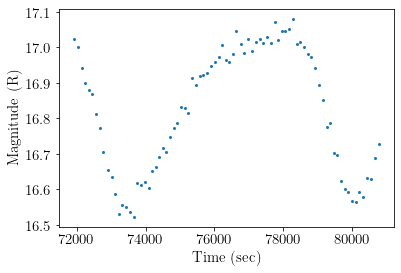

In [84]:
VariableIndex = 0
ReferenceIndex = 2
for i in range(6):
    magnitudes = RStar_TAGS[i][1][1:]
    print(magnitudes[0])
    times = RStar_TAGS[i][0][1:]
    if i == 0:
        
        plt.scatter(times, magnitudes, s=4)
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude (R)')
plt.show()

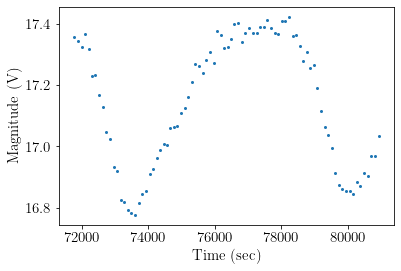

In [86]:
data = pandas.read_csv('VBANDOUTPUT.LIST', skiprows=1, delimiter='\s+')
VStar_TAGS = [[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]],[[0],[0],[0]]] #multidimensional array, first index corresponds to star
for index, row in data.iterrows():
    if row[0] != '#':
        TAG = int(row[0])-1
        day = '30'
        month = '09'
        hour = row[1][11:13] ## convert to UTC
        if int(hour) >=17:
            day = '02'
            month = '10'
            hour = '0' + str(int(hour)+7-24)
        minute = row[1][13:15]
        second = row[1][15:17]
        MJDTime = '2020-' + month + '-' + day + 'T' + str(hour) + ':' + str(row[1][13:15]) + ':' + str(row[1][15:17]) 
        t = Time(MJDTime, format='isot', scale='utc')
        magnitude = float(row[8])
        magErr = float(row[9])
        VStar_TAGS[TAG][0].append(float(second)+float(minute)*60+float(row[1][11:13])*3600)
        #VStar_TAGS[TAG][0].append(t.jd)
        VStar_TAGS[TAG][1].append(magnitude)
        VStar_TAGS[TAG][2].append(magErr)

magnitudes = VStar_TAGS[0][1][1:]
times = VStar_TAGS[0][0][1:]
plt.scatter(times, magnitudes, s=4)
plt.xlabel('Time (sec)')
plt.ylabel('Magnitude (V)')
plt.show()

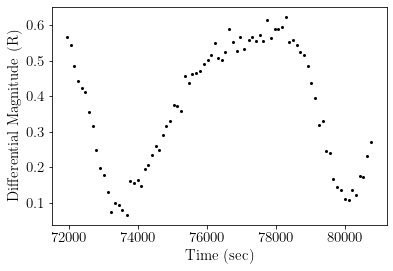

In [87]:
VariableIndex = 0
ReferenceIndex = 2
VariableMagnitudeR = np.array(RStar_TAGS[VariableIndex][1][1:])
ReferenceMagnitudeR = np.array(RStar_TAGS[ReferenceIndex][1][1:])
DiffMagnitudeR = VariableMagnitudeR-ReferenceMagnitudeR[i]
VartimeR = np.array(RStar_TAGS[VariableIndex][0][1:])
   
plt.scatter(VartimeR, DiffMagnitudeR, s=4,color='black')

plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude (R)')
plt.show()

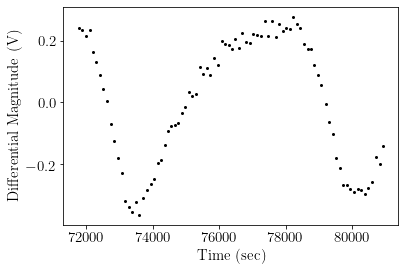

In [88]:
VariableIndex = 0
ReferenceIndex = 2
VariableMagnitudeV = np.array(VStar_TAGS[VariableIndex][1][1:])
VmagnitudeErrs = np.array(VStar_TAGS[VariableIndex][2][1:])

ReferenceMagnitudeV = np.array(VStar_TAGS[ReferenceIndex][1][1:])
DiffMagnitudeV = VariableMagnitudeV-ReferenceMagnitudeV
VartimeV = np.array(VStar_TAGS[VariableIndex][0][1:])
 

plt.scatter(VartimeV, DiffMagnitudeV, s=4,color='black')
#plt.errorbar(VartimeV, DiffMagnitudeV, yerr=.01*VariableMagnitudeV,ls='',capsize=4,capthick=.5, color='darkblue')

f= open("Vlightcurve.txt","w+")
f.write("time(seconds) Differential Magnitude \n")
for i in range(len(DiffMagnitudeV)):
    f.write(str(VartimeV[i]) + ' ' + str(DiffMagnitudeV[i]) + "\n")
f.close()

plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude (V)')
plt.show()

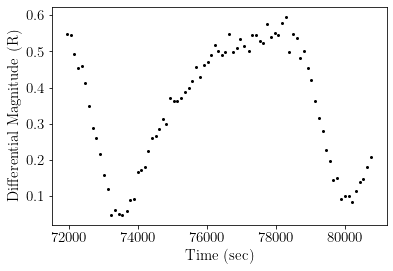

0.665481927710843
0.3195444101989331


In [89]:
VariableIndex = 0
ReferenceIndex = 2
VariableMagnitudeR = np.array(RStar_TAGS[VariableIndex][1][1:])
RmagnitudeErrs = np.array(RStar_TAGS[VariableIndex][2][1:])

ReferenceMagnitudeR = np.array(RStar_TAGS[ReferenceIndex][1][1:])
DiffMagnitudeR = VariableMagnitudeR-ReferenceMagnitudeR
VartimeR = np.array(RStar_TAGS[VariableIndex][0][1:])
 

plt.scatter(VartimeR, DiffMagnitudeR, s=4,color='black')

f= open("Rlightcurve.txt","w+")
f.write("time(seconds) Differential Magnitude \n")
for i in range(len(DiffMagnitudeR)):
    f.write(str(VartimeR[i]) + ' ' + str(DiffMagnitudeR[i]) + "\n")
f.close()
#for i in DiffMagnitudeR:
#    print(.02)
plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude (R)')
plt.show()
print(mean(ReferenceMagnitudeV)-mean(ReferenceMagnitudeR))
print(mean(VariableMagnitudeV)-mean(VariableMagnitudeR))

[ 0.38372784  0.0508282  -0.20186358  0.09051311 -0.0257255 ]


Power_divergenceResult(statistic=0.5358697645737719, pvalue=1.0)

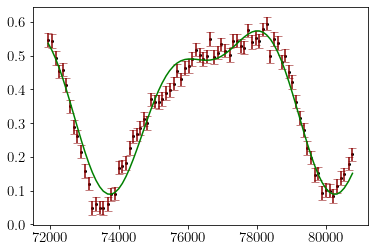

In [90]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

#def fourier_series(x, a0=0.3,a1=0.3,b1=0.3,a2=0.3,b2=0.3,a3=0.3,b3=0.3,a4=0.3,b4=0.3,a5=0.3,b5=0.3,w=0.0009619319,t0=-72000):
def fourier_series(x, a0=0.3,a1=0,b1=0,a2=0,b2=0,w=0.0009619319,t0=-72000):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Construct the series
    series = []
    for i in range(len(x)):
        sum1 = a0 + a1 * math.cos(w * (t0+x[i])) + b1 * math.sin(w * (t0+x[i])) 
        sum2 = a2*math.cos(2*w * (t0+x[i])) + b2 * math.sin(2*w * (t0+x[i]))
        #sum3 = a3*math.cos(3*w * (t0+x[i])) + b3 * math.sin(3*w * (t0+x[i]))
        #sum4 = a4*math.cos(4*w * (t0+x[i])) + b4 * math.sin(4*w * (t0+x[i]))
        #sum5 = a5*math.cos(5*w * (t0+x[i])) + b5 * math.sin(5*w * (t0+x[i]))
        series.append(sum1+sum2)
    return np.array(series)



# Make step function data
xdata = VartimeR
ydata = DiffMagnitudeR
# Define a Fit object for this model and data
#fit = Fit(model_dict, x=xdata, y=ydata,sigma_y=RmagnitudeErrs)
#fit_result = fit.execute()
params = [0.3,0.25,0, 0, 0.0009619319]
best_params0, covar0 = curve_fit(fourier_series, xdata, ydata, 
                                                     p0=params, sigma=RmagnitudeErrs)
print(best_params0)
#print(covar0)
#print(fit_result)
#print(ydata)
# Plot the result
plt.scatter(xdata, ydata, s=4,color='black')
plt.errorbar(xdata, ydata, yerr=0.02,ls='',capsize=4,capthick=.5, color='darkred')
fit = fourier_series(xdata,best_params0[0],best_params0[1],best_params0[2],best_params0[3])
plt.plot(xdata, fit, color='green', ls='-')
scipy.stats.chisquare(ydata, f_exp=fit,ddof=1)

[7.00e+03 5.95e-01 0.00e+00]


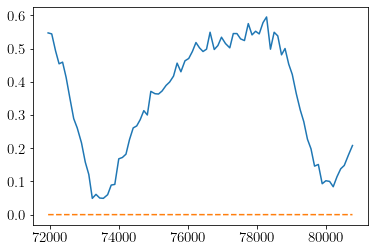

In [91]:


from scipy.optimize import leastsq


def make_sine_graph( params, xData):
    """
    take amplitudes A and phases P in form [ A0, A1, A2, ..., An, P0, P1,..., Pn ]
    and construct function f = A0 sin( w t + P0) + A1 sin( 2 w t + Pn ) + ... + An sin( n w t + Pn )
    and return f( x )
    """
    fr = params[0]
    npara = params[1:]
    lp =len( npara )
    amps = npara[ : lp // 2 ]
    phases = npara[ lp // 2 : ]
    fact = range(1, lp // 2 + 1 )
    return [ sum( [ a * np.sin( 2 * np.pi * x * f * fr + p ) for a, p, f in zip( amps, phases, fact ) ] ) for x in xData ]

def sine_residuals( params , xData, yData):
    yTh = make_sine_graph( params, xData )
    diff = [ y -  yt for y, yt in zip( yData, yTh ) ]
    return diff

def sine_fit_graph( xData, yData, freqGuess=100., sineorder = 3 ):
    aStart = sineorder * [ 0 ]
    aStart[0] = max( yData )
    pStart = sineorder * [ 0 ]
    result, _ = leastsq( sine_residuals, [ freqGuess ] + aStart + pStart, args=( xData, yData ) )
    return result

if True:
    timeList = VartimeR
    signalList = DiffMagnitudeR

    result = sine_fit_graph( timeList, signalList, freqGuess=7000., sineorder = 1 )
    print(result)
    fitList =  make_sine_graph( result, timeList )
    fig = plt.figure()
    ax = fig.add_subplot( 1, 1 ,1 )
    ax.plot( timeList, signalList )
    ax.plot( timeList, fitList, '--' )
    plt.show()
    

  time   band         flux        fluxerr  zp  zpsys
------- ----- ------------------- ------- ---- -----
71934.0 sdssr   0.546999999999997   0.013 25.0    ab
72039.0 sdssr  0.5440000000000005   0.013 25.0    ab
72150.0 sdssr 0.49299999999999855   0.012 25.0    ab
72252.0 sdssr  0.4539999999999971   0.012 25.0    ab
72354.0 sdssr 0.45899999999999963   0.012 25.0    ab
72457.0 sdssr 0.41300000000000026   0.012 25.0    ab
72567.0 sdssr  0.3500000000000014   0.011 25.0    ab
72677.0 sdssr  0.2890000000000015   0.011 25.0    ab
72779.0 sdssr 0.26099999999999923    0.01 25.0    ab
72903.0 sdssr 0.21600000000000108    0.01 25.0    ab
    ...   ...                 ...     ...  ...   ...
79669.0 sdssr  0.1460000000000008    0.01 25.0    ab
79779.0 sdssr  0.1509999999999998    0.01 25.0    ab
79891.0 sdssr 0.09299999999999997    0.01 25.0    ab
79997.0 sdssr 0.10200000000000031    0.01 25.0    ab
80106.0 sdssr 0.10000000000000142    0.01 25.0    ab
80211.0 sdssr 0.08399999999999963    0.01 25.0

<ipython-input-92-dd020f75e118>:19: DeprecationWarning: Using keyword `forced_parameters` is deprecated. Use `name` instead
  res, fitted_model = sncosmo.fit_lc(data, model,['z', 't0', 'x0', 'x1', 'c'],bounds={'z':(0, 0.0001)})


80909.13753546395

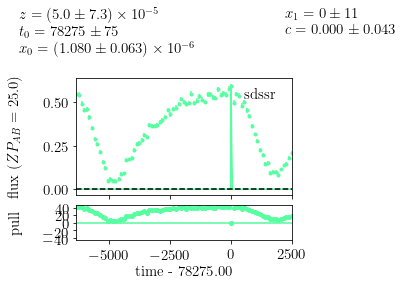

In [92]:
#data = sncosmo.load_example_data()
#sncosmo.write_lc(data, 'example.txt')
if True:
    time = VartimeR
    magnitude = DiffMagnitudeR
    magnitudeError = RmagnitudeErrs
    with open('test.txt','w+') as file:
        file.write('@xl 0.5 \n')
        file.write('@c 0.2 \n')
        file.write('@z 0.5 \n')
        file.write('@x0 ' + str(magnitude[0]) + '\n')
        file.write('@t0 ' + str(time[0]) + '\n')
        file.write('time band flux fluxerr zp zpsys \n')
        for datapoint in range(len(time)):
            file.write(str(time[datapoint]) + ' ' + 'sdssr ' + str(magnitude[datapoint]) + ' ' + str(magnitudeError[datapoint]) + ' 25.0 ab \n')
        data = sncosmo.read_lc('example.txt')
print(data)
model = sncosmo.Model(source='salt2')
res, fitted_model = sncosmo.fit_lc(data, model,['z', 't0', 'x0', 'x1', 'c'],bounds={'z':(0, 0.0001)})
sncosmo.plot_lc(data, model=fitted_model, errors=res.errors)
res.chisq

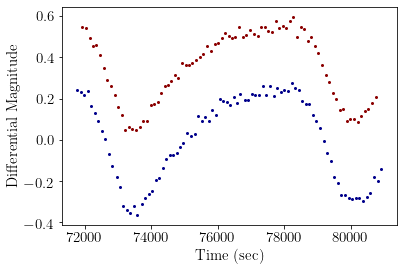

In [94]:

plt.scatter(VartimeV, DiffMagnitudeV, s=4,color='darkblue')
plt.scatter(VartimeR, DiffMagnitudeR, s=4,color='darkred')
#with open('DifferentialMagnitudeVBand.csv', 'w+'') as csvfile: 


plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude')
plt.show()

In [95]:
## RBAND
a0 = 0.3826
a1 = 0.06696
a2 = 0.08187
a3 = 0.023218 
a4 = -0.0067719 
a5 = -0.0028473 
b1 = -0.1954 
b2 = -0.0024281
b3 = 0.026963 
b4 = 0.0040846 
b5 = -0.000083139
t0 = -71867
w = 0.00095136
timesR = VartimeV
ProjectionRBand = fourier_series(timesR,a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,w,t0)

plt.scatter(timesR, ProjectionRBand, s=4,color='red')
plt.scatter(VartimeR, DiffMagnitudeR, s=4,color='black')
plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude (R)')
plt.show()

list = [a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5]
totSum = 0
for i in list:
    totSum += i**2
print(totSum**.5)
    
## VBAND
a0 = 0.042293
a1 = 0.0685
a2 = 0.094044
a3 = 0.025438 
a4 = -0.0057433 
a5 = -0.0011205 
b1 = -0.2417 
b2 = -0.0078239 
b3 = 0.024548
b4 = 0.0094819
b5 = 0.0014096
t0 = -71930
w = 0.00095377
timesV = VartimeV
ProjectionVBand = fourier_series(timesV,a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5,w,t0)
plt.scatter(timesV, ProjectionVBand, s=4,color='red')
print(max(ProjectionVBand)-min(ProjectionVBand))
print(max(ProjectionRBand)-min(ProjectionRBand))
list = [a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,b5]
totSum = 0
for i in list:
    totSum += i**2
print(totSum**.5)

plt.scatter(VartimeV, DiffMagnitudeV, s=4,color='black')
plt.xlabel('Time (sec)')
plt.ylabel('Differential Magnitude (V)')
plt.show()

TypeError: fourier_series() takes from 1 to 8 positional arguments but 14 were given

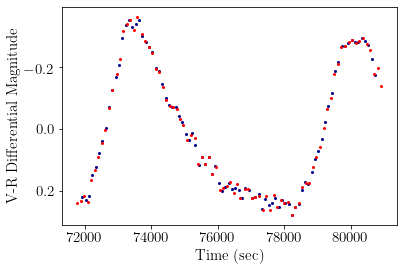

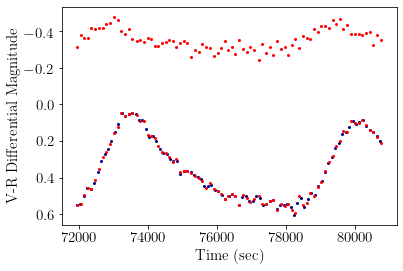

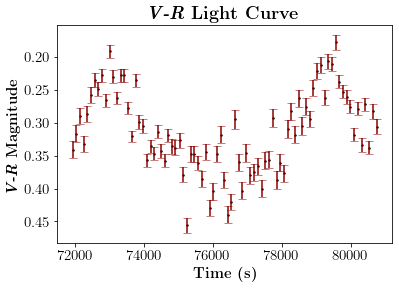

In [118]:
from scipy import interpolate

T = np.array(range(int(min(VartimeR)),int(max(VartimeR)),100))
tck = interpolate.splrep(VartimeR, DiffMagnitudeR)
Rfit = np.array(interpolate.splev(T, tck))

tck = interpolate.splrep(VartimeV, DiffMagnitudeV)
Vfit = np.array(interpolate.splev(T, tck))


plt.scatter(T,Vfit, s=4,color='darkblue')
plt.scatter(VartimeV, DiffMagnitudeV, s=4,color='red')

plt.xlabel('Time (sec)')
plt.ylabel('V-R Differential Magnitude')
plt.gca().invert_yaxis()
plt.show()

plt.scatter(T,Rfit, s=4,color='darkblue')
plt.scatter(VartimeR, DiffMagnitudeR, s=4,color='red')
plt.scatter(VartimeR, DiffMagnitudeV[3:]-DiffMagnitudeR, s=4,color='red')

plt.xlabel('Time (sec)')
plt.ylabel('V-R Differential Magnitude')
plt.gca().invert_yaxis()
plt.show()

#plt.scatter(T,Rfit, s=4,color='darkblue')
#plt.scatter(T, Vfit-Rfit, s=2,color='red')
plt.scatter(VartimeR, VariableMagnitudeV[3:]-VariableMagnitudeR,s=2,color='black')
plt.errorbar(VartimeR, VariableMagnitudeV[3:]-VariableMagnitudeR, yerr=RmagnitudeErrs,ls='',capsize=4,capthick=.5, color='darkred')
    
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size = 15)
plt.title(r'\textbf{\textit{V-R} Light Curve}')
plt.ylabel(r'\textbf{\textit{V-R} Magnitude}')
plt.xlabel(r'\textbf{Time (s)}')
plt.gca().invert_yaxis()
plt.savefig("V-R_LightCurve.pdf")
plt.show()

In [97]:
plt.scatter(timesV, ProjectionVBand-ProjectionRBand, s=4,color='red')
plt.scatter(timesV, ProjectionVBand, s=4,color='red')

plt.xlabel('Time (sec)')
plt.ylabel('V-R Differential Magnitude')
plt.show()

ValueError: operands could not be broadcast together with shapes (6172,) (10105,) 